<a href="https://colab.research.google.com/github/Ishakasar/assignments/blob/master/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

You are provided with historical sales data for 45 stores of a Retail chain located in different
regions. Each store contains a number of departments, and you are tasked with predicting the
department-wide sales for each store.
The data is provided in 4 different CSVs as below:
stores.csv
This file contains anonymized information about the 45 stores, indicating the type and size of
store.
train.csv
This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you
will find the following fields:

● Store - the store number\
● Dept - the department number\
● Date - the week\
● Weekly_Sales - sales for the given department in the given store\
● IsHoliday - whether the week is a special holiday week

test.csv
This file is identical to train.csv, except we have withheld the weekly sales. You must predict the
sales for each triplet of store, department, and date in this file.
features.csv
This file contains additional data related to the store, department, and regional activity for the
given dates. It contains the following fields:\
●Store - the store number\
● Date - the week\
● Temperature - average temperature in the region\
● Fuel_Price - cost of fuel in the region\
● MarkDown1-5 - anonymized data related to promotional markdowns that the Retail
chain is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.\
● CPI - the consumer price index\
● Unemployment - the unemployment rate\
● IsHoliday - whether the week is a special holiday week
Output\
You are expected to predict the weekly sales with a time horizon of a week and share the results in the form of CSVs. Along with that you would be required to do a through EDA on the given dataset and bubble up insights.
Also along with the result submission the implementation in the form of a python notebook is also expected to be submitted.


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
features=pd.read_csv('/content/drive/MyDrive/bluepi/sales-prediction (1)/features.csv/features.csv')
train=pd.read_csv('/content/drive/MyDrive/bluepi/sales-prediction (1)/train.csv/train.csv')
stores=pd.read_csv('/content/drive/MyDrive/bluepi/sales-prediction (1)/stores.csv')
test=pd.read_csv('/content/drive/MyDrive/bluepi/sales-prediction (1)/test.csv/test.csv')

Starting with basic analysisof the datasets.

In [111]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [112]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [113]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [114]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [115]:
#Checking for null values.
def inform(x):
  print(x.info())
  print('------------------------------------------------\n')
  print(x.isna().sum())



In [116]:
inform(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
------------------------------------------------

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       

In [117]:
inform(stores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
------------------------------------------------

Store    0
Type     0
Size     0
dtype: int64


In [118]:
inform(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
------------------------------------------------

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [119]:
inform(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None
------------------------------------------------

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


## 1. Features have most null values in Markdown ccolumns.
## 2. Test has only 4 columns Store, Dept, Date, Holiday.


In [120]:
#Merging all dfs.
feat_store=pd.merge(features, stores)
train=pd.merge(feat_store, train).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test=pd.merge(feat_store, test).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [121]:
train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,1,46039.49
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,1,41595.55
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,1,19403.54
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,1,21827.90


In [122]:
train.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
421565,45,2012-09-28,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221,98,508.37
421566,45,2012-10-05,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221,98,628.10
421567,45,2012-10-12,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221,98,1061.02
421568,45,2012-10-19,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221,98,760.01
421569,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,98,1076.80


In [123]:
test.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept
0,1,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,1
1,1,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,A,151315,1
2,1,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,A,151315,1
3,1,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,A,151315,1
4,1,2012-11-30,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False,A,151315,1


In [124]:
test.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept
115059,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,98
115060,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,98
115061,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,98
115062,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,98
115063,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,98


## The Test df starts immediately after train dataset.

In [125]:
#Convert Date column to datetime type
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

#Extracting week, month and year from Date
train['Week'] = train['Date'].dt.isocalendar().week
test['Week'] = test['Date'].dt.isocalendar().week

train['month'] = train['Date'].dt.month
test['month'] = test['Date'].dt.month

train['Year'] = train['Date'].dt.isocalendar().year
test['Year'] = test['Date'].dt.isocalendar().year



In [126]:
train.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,month,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,5,2,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,1,46039.49,6,2,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,1,41595.55,7,2,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,1,19403.54,8,2,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,1,21827.90,9,3,2010


In [127]:
#Onehot encoding the holiday variable
train['IsHoliday'] = train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
test['IsHoliday'] = test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [128]:
#Check where Date and  total years.
print(f'The starting date is {train.Date.min()} and end date is {train.Date.max()}')
y=train["Year"].unique()
print(f'The Data captures sales for following year:{y}')

The starting date is 2010-02-05 00:00:00 and end date is 2012-10-26 00:00:00
The Data captures sales for following year:<IntegerArray>
[2010, 2011, 2012]
Length: 3, dtype: UInt32


In [129]:
#Check the week, date and month of holidays in given time
holiday_days=train.loc[train['IsHoliday'] == 1, ['Date','Week','month']].drop_duplicates()
holiday_days

,Date,Week,month
1,2010-02-12,6,2
31,2010-09-10,36,9
42,2010-11-26,47,11
47,2010-12-31,52,12
53,2011-02-11,6,2
83,2011-09-09,36,9
94,2011-11-25,47,11
99,2011-12-30,52,12
105,2012-02-10,6,2
135,2012-09-07,36,9


## There are only 4 holidays which come on a fixed day every year.






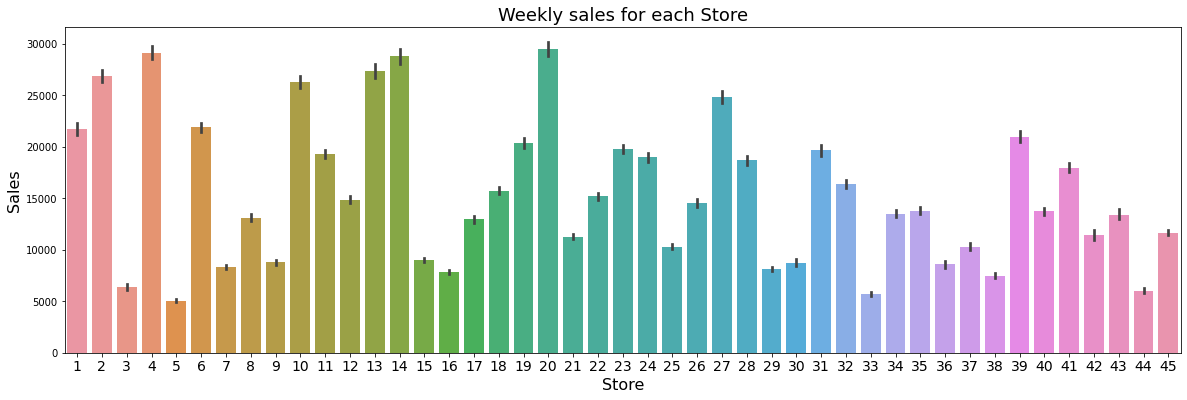

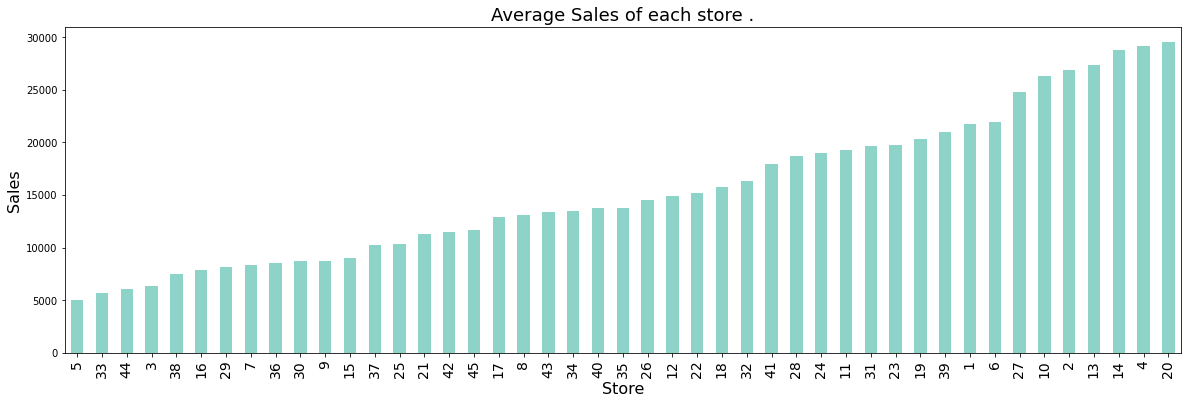

In [130]:
#Sales as per Store
fig = plt.figure(figsize =(20,6))
sns.barplot(x='Store', y='Weekly_Sales', data=train)
plt.title('Weekly sales for each Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.tick_params(axis='x', labelsize=14)

#Avg sales in each store
plt.figure(figsize=(20,6))
train.groupby('Store').mean()['Weekly_Sales'].sort_values().plot(kind='bar',cmap='Set3')
plt.title(f'Average Sales of each store .', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.tick_params(axis='x', labelsize=14)

##We can see that some stores are not performing well this could be effect of type or the size of the store.

Text(0.5, 1.0, 'Avg Weekly sales by different Store types')

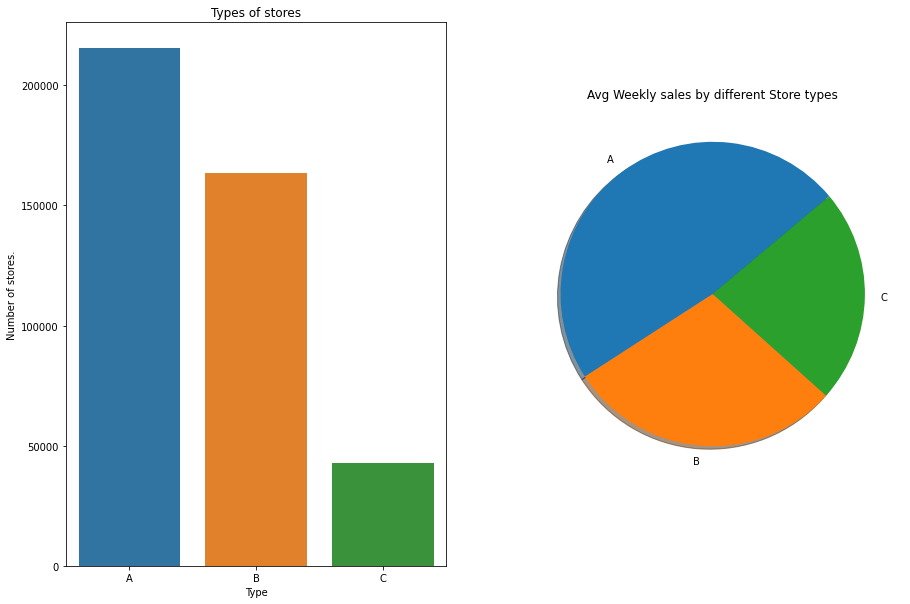

In [131]:
#Total number of types of store and avg weekly sales
plt.figure(figsize=(15, 10))
ax1=plt.subplot(121)
# Count of different types of stores
sns.barplot(x='index', y='Type',data=train['Type'].value_counts().reset_index())
plt.xlabel('Type')
plt.ylabel('Number of stores.')
plt.title('Types of stores')


# Avg sales on different stores types
sales = train.groupby('Type')['Weekly_Sales'].mean().reset_index()
ax2 = plt.subplot(122)
explode =(0.09,0,0.1)
plt.pie(sales['Weekly_Sales'], labels= sales['Type'], startangle=40, shadow = True)
plt.title(f'Avg Weekly sales by different Store types')

## 1. Number of stores of type A are greater, followed by B and C.
## 2. Averages sales of stores based on type are proportional to number of stores of a specific type.

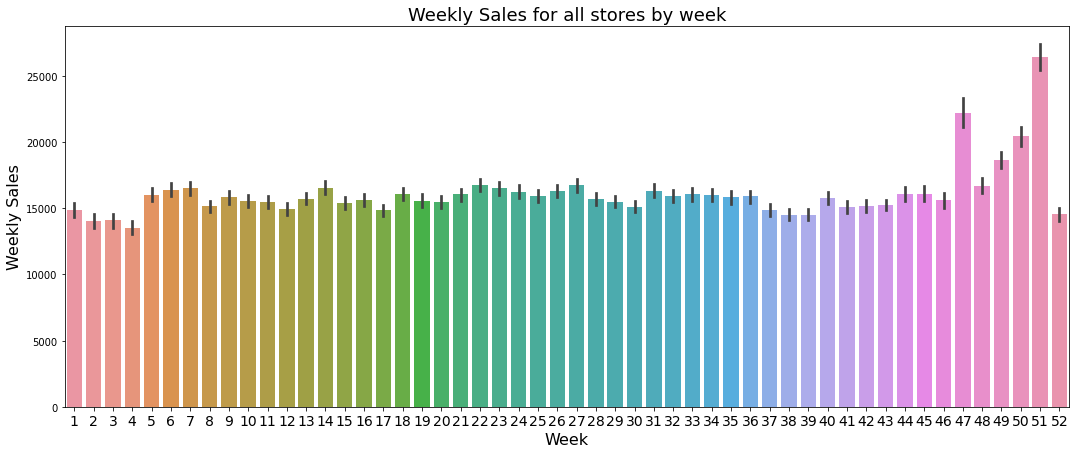

In [132]:
#Sales as per Store
fig = plt.figure(figsize =(18,7))
sns.barplot(x='Week', y='Weekly_Sales', data=train)
plt.title('Weekly Sales for all stores by week', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.tick_params(axis='x', labelsize=14)



##From the above graph we can se that there is a hike in prices at year end but we can see there is a hike in sales near month ends too, which could be because people usually get salaries around then, this could help the store to have some promotions or offers then to hike their sales.

##We don't know how the store types are decided, let's compare store type to size.


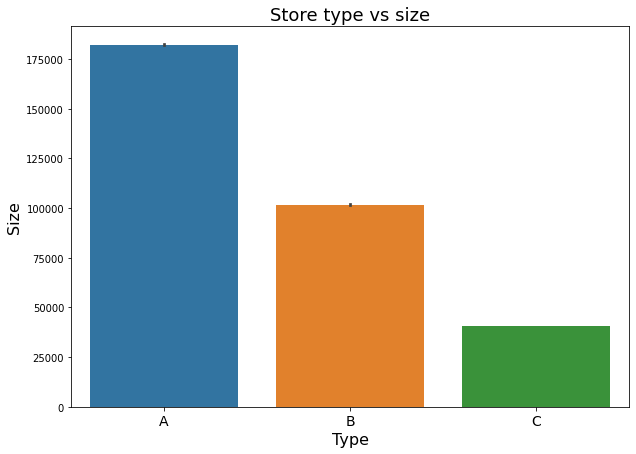

In [133]:
#Sales as per Store
fig = plt.figure(figsize =(10,7))
sns.barplot(x='Type', y='Size', data=train)
plt.title('Store type vs size', fontsize=18)
plt.ylabel('Size', fontsize=16)
plt.xlabel('Type', fontsize=16)
plt.tick_params(axis='x', labelsize=14)


##The above bar plot suggests that the type of the store might be decided by its size.

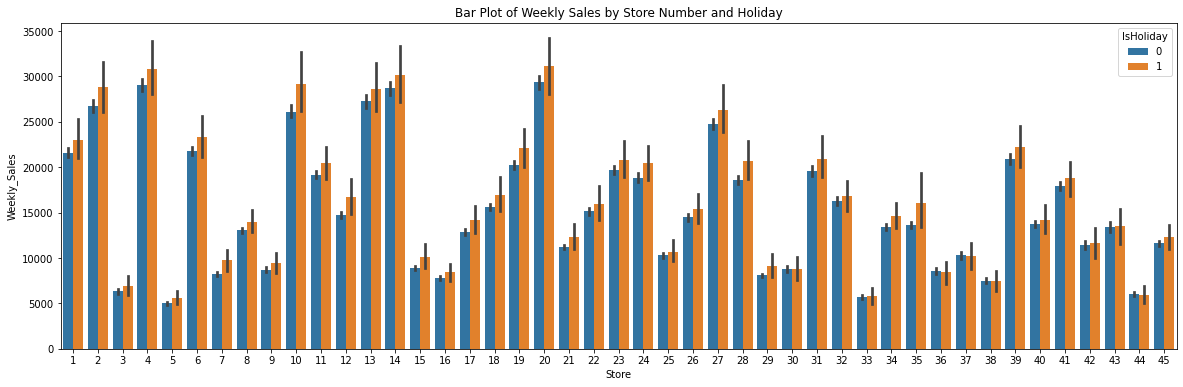

In [134]:
#Weekly sales for each store wrt holidays

sholiday = pd.concat([train['Store'], train['Weekly_Sales'], train['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Bar Plot of Weekly Sales by Store Number and Holiday')
fig = sns.barplot(x='Store', y='Weekly_Sales', data=sholiday, hue='IsHoliday')



##For all the stores, holidays show hike in sales. This could be because of some promotions that the store might be having during holiday season.

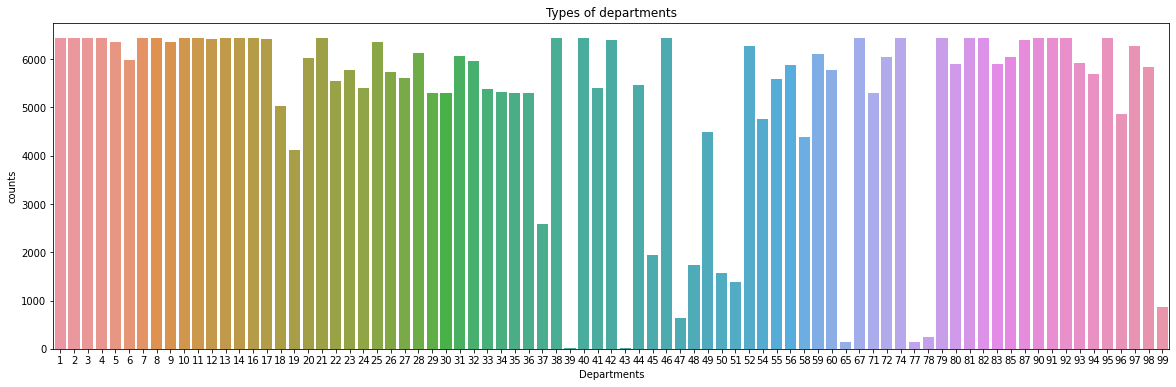

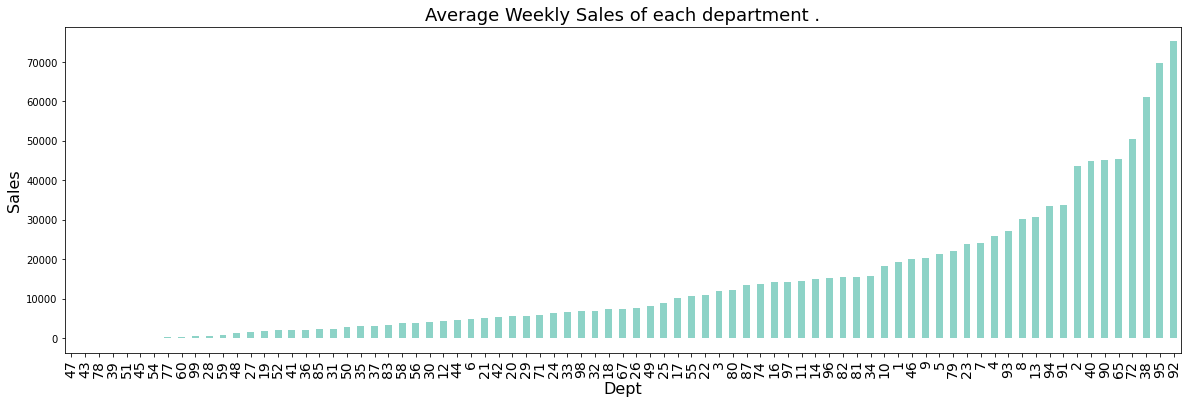

In [135]:
#Total number of departments:
plt.figure(figsize=(20, 6))
# Count of different types of departments
sns.barplot(x='index', y='Dept',data=train['Dept'].value_counts().reset_index())
plt.xlabel('Departments')
plt.ylabel('counts')
plt.title('Types of departments')

#avg sales across each dept
plt.figure(figsize=(20,6))
train.groupby('Dept').mean()['Weekly_Sales'].sort_values().plot(kind='bar',cmap='Set3')
plt.title(f'Average Weekly Sales of each department .', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.tick_params(axis='x', labelsize=14)


##We have 99 departments and we can see a vast difference in the sales of some departments, company should find a reason why that is so.

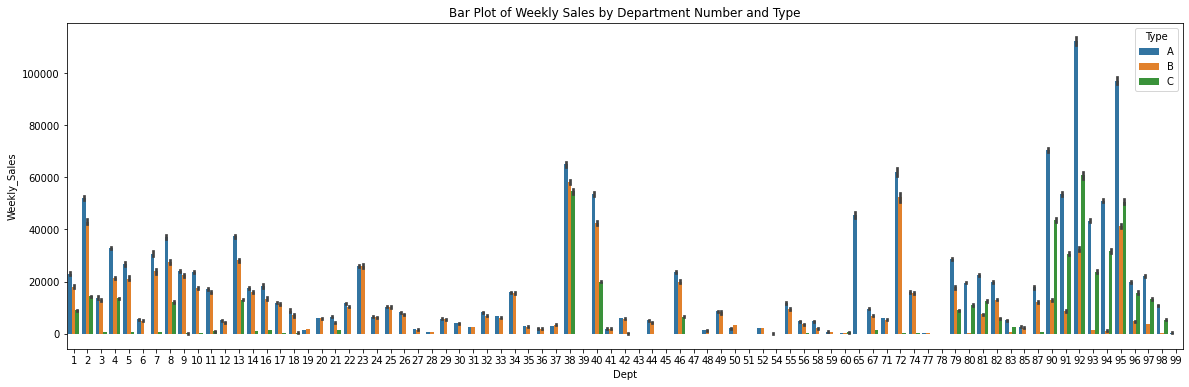

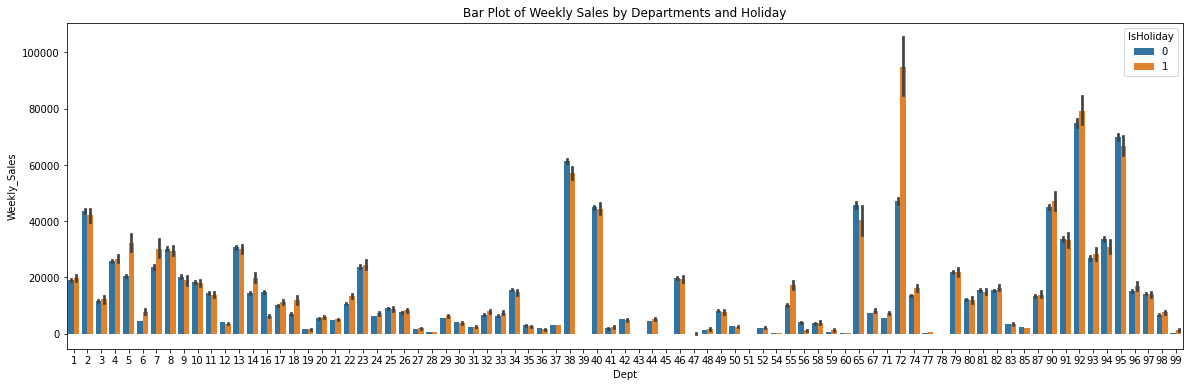

In [136]:
#Analyze if there is any effect of type and holiday on the dept
Dtype = pd.concat([train['Dept'], train['Weekly_Sales'], train['Type']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Bar Plot of Weekly Sales by Department Number and Type')
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=Dtype, hue='Type')


dholiday = pd.concat([train['Dept'], train['Weekly_Sales'], train['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Bar Plot of Weekly Sales by Departments and Holiday')
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=dholiday, hue='IsHoliday')





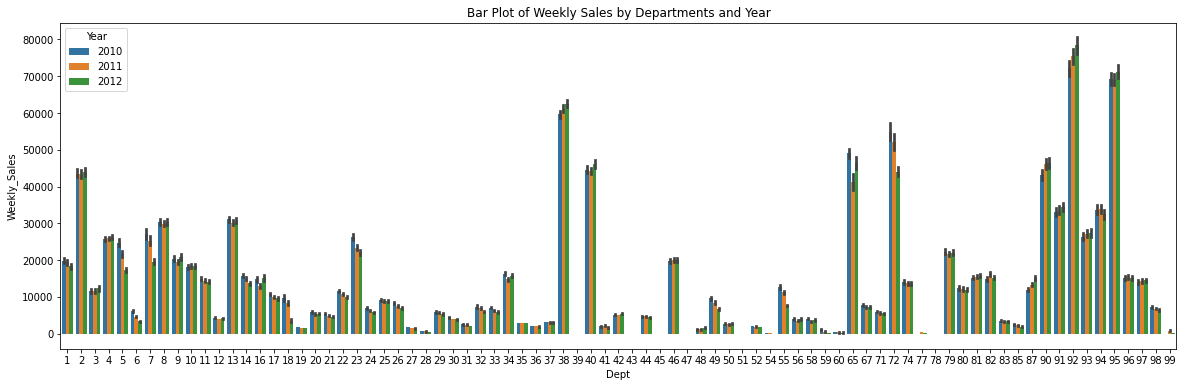

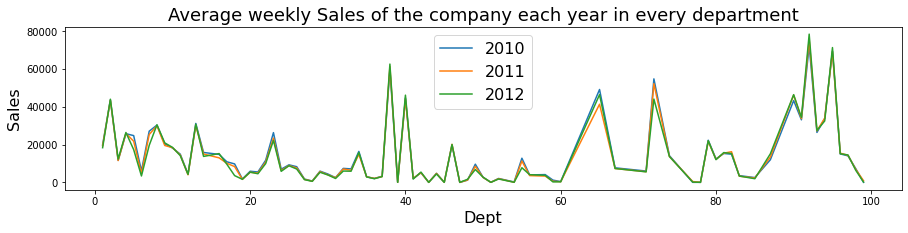

In [137]:
dyear = pd.concat([train['Dept'], train['Weekly_Sales'], train['Year']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Bar Plot of Weekly Sales by Departments and Year')
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=dyear, hue='Year')


#Let's see Week wise sales and month wise sales each year.
plt.figure(figsize=(15,3))
train[train['Year']==2010].groupby('Dept').mean()['Weekly_Sales'].plot()
train[train['Year']==2011].groupby('Dept').mean()['Weekly_Sales'].plot()
train[train['Year']==2012].groupby('Dept').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company each year in every department', fontsize=18)
plt.legend(['2010', '2011', '2012'], fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16);

## 1. We see kind of same pattern of sales even within the departments wrt to store type, when we see for holidays only 4 to 5 Departments such as 65,72, 92 show a drastic difference in sales on holidays and non holidays.

## 2. If we see sales every year, we can see a pattern for every year, the could be seasonal departments such as Stationaries, Winter wear, Rain wear etc. We can also see some departments are not doing well at all throught the year. In this case if the company could manage the floor space in a way that less selling departments should be shifted to bigger stores and the departments that do well should be increased.

## 3.As sales is higher during holidays and it’s seasonal, stores can add season specific items.

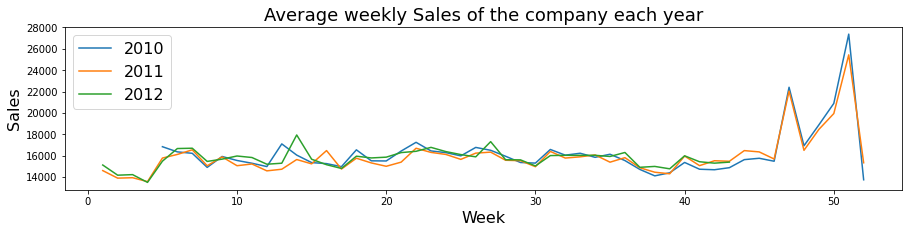

In [138]:
#Let's see Week wise sales and month wise sales each year.
plt.figure(figsize=(15,3))
train[train['Year']==2010].groupby('Week').mean()['Weekly_Sales'].plot()
train[train['Year']==2011].groupby('Week').mean()['Weekly_Sales'].plot()
train[train['Year']==2012].groupby('Week').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16);
    


#Hike in sale in end of year in all three years.(coincidinding with holiday)

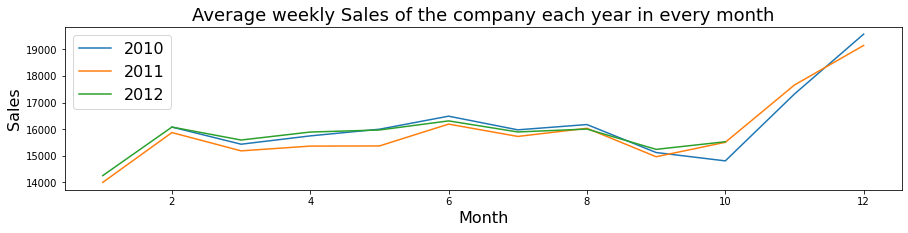

In [139]:
#Let's see Week wise sales and month wise sales each year.
plt.figure(figsize=(15,3))
train[train['Year']==2010].groupby('month').mean()['Weekly_Sales'].plot()
train[train['Year']==2011].groupby('month').mean()['Weekly_Sales'].plot()
train[train['Year']==2012].groupby('month').mean()['Weekly_Sales'].plot()
plt.title('Average weekly Sales of the company each year in every month', fontsize=18)
plt.legend(['2010', '2011', '2012'], fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Month', fontsize=16);

##Hike in sales corresponds to month with holidays.
##Also we can see slight changes within the months.
##The above graph suggests that the sales in november and december are so high that the company can hire more during september  because cost of that human resource would be less as compared to the benefits of better sales in winter months.

#Let's analyze features: Temperature, Fuel price, CPI, unemployment

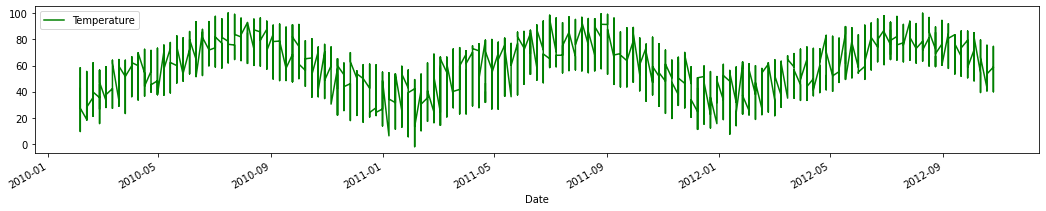

In [140]:
#Lets see how these feature change throught the data set and if they have any affect on weekly sales or not.
train[['Date', 'Temperature']].plot(x='Date', subplots=True, figsize=(18,3), color='green');


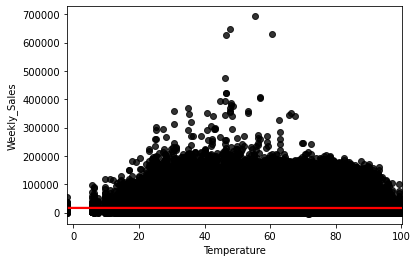

In [141]:
sns.regplot(x='Temperature',y='Weekly_Sales', data = train, scatter_kws={"color": "black"}, line_kws={"color": "red"})


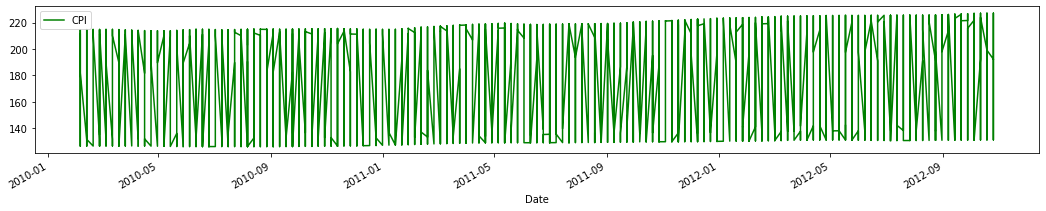

In [142]:
train[['Date', 'CPI']].plot(x='Date', subplots=True, figsize=(18,3), color='green');

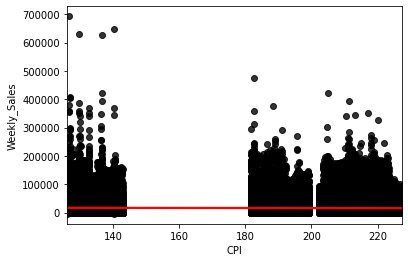

In [143]:
sns.regplot(x='CPI',y='Weekly_Sales', data = train, scatter_kws={"color": "black"}, line_kws={"color": "red"})


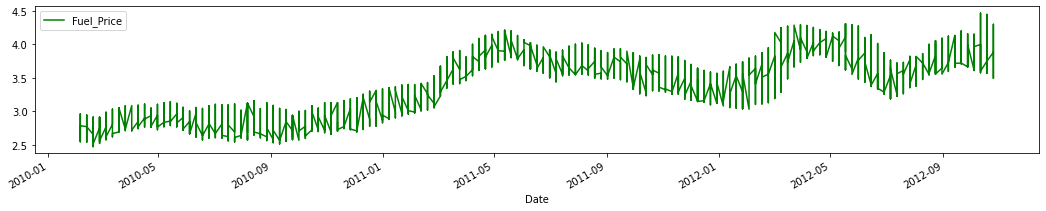

In [144]:
train[['Date', 'Fuel_Price']].plot(x='Date', subplots=True, figsize=(18,3), color='green');


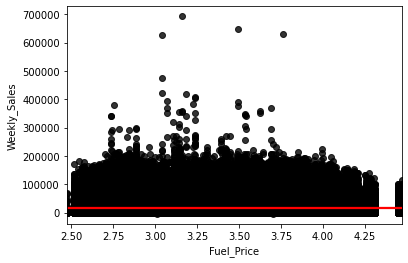

In [145]:
sns.regplot(x='Fuel_Price',y='Weekly_Sales', data = train, scatter_kws={"color": "black"}, line_kws={"color": "red"})


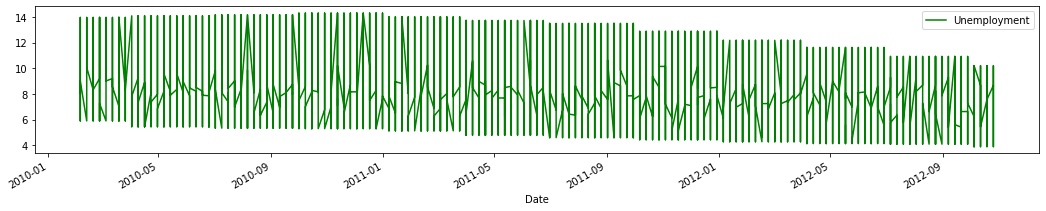

In [146]:
train[['Date', 'Unemployment']].plot(x='Date', subplots=True, figsize=(18,3), color='green');

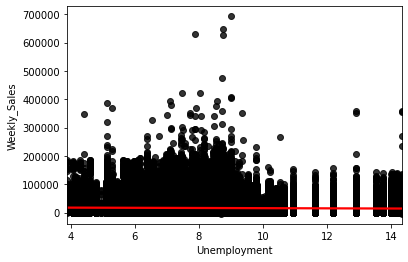

In [147]:
sns.regplot(x='Unemployment',y='Weekly_Sales', data = train, scatter_kws={"color": "black"}, line_kws={"color": "red"})


##Temperature shows seasonality, fuel price and CPI show and increasing trend while unemployment shows a decreasing trend over the years.
##None of the featurs show any relation with the sales so I would drop them.

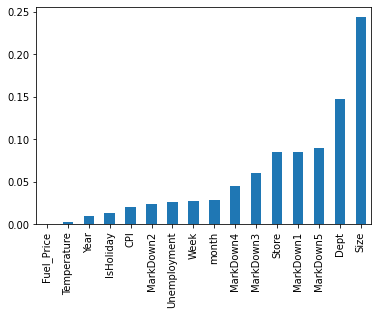

In [148]:
#Finally analyzing the markdown features.
train.corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

In [149]:
new=train.fillna(0)

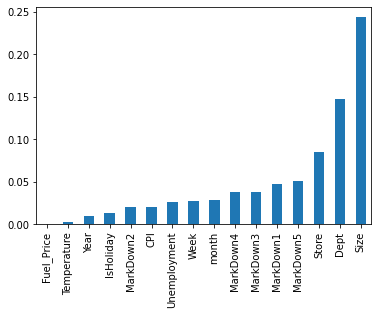

In [150]:
#Checking correlation after filling null values.
new.corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

##We don't see a very high correlation of MarkDowns with weekly sales.


#**Feature engineering and Feature selection**

##I have decided to drop Temperature, Fuel price, CPI, unemployment, Markdown columns because they are not contributing a lot in sales and Markdown columns, even though they contain information about promotion the data present is after 2011 and we see no specific difference in that time frame.

In [151]:
#Dropping unecessary columns
train.drop([ 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis = 1, inplace=True)


test.drop([ 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis = 1, inplace=True)

In [152]:
#Onehot encoding the type column
train['Type']= train['Type'].apply(lambda x: 1 if x== 'A' else (2 if x == 'B' else 3))
test['Type']= test['Type'].apply(lambda x: 1 if x== 'A' else (2 if x == 'B' else 3))


In [153]:
#Converting week to int from datetime
train['Week'] = train['Week'].astype(int)
train['month'] = train['month'].astype(int)
test['Week'] = test['Week'].astype(int)
test['month'] = test['month'].astype(int)




In [154]:
trainlag= pd.concat([train, test])

In [155]:
trainlag.head()

,Store,Date,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,month,Year
0,1,2010-02-05,0,1,151315,1,24924.50,5,2,2010
1,1,2010-02-12,1,1,151315,1,46039.49,6,2,2010
2,1,2010-02-19,0,1,151315,1,41595.55,7,2,2010
3,1,2010-02-26,0,1,151315,1,19403.54,8,2,2010
4,1,2010-03-05,0,1,151315,1,21827.90,9,3,2010


In [156]:
# 1 day lag
for i in range(0,4):
 trainlag[f'lag_weekly{i}'] = trainlag['Weekly_Sales'].shift(i+1).fillna(0)
#1 week lag
for j in range(0,5):
  trainlag[f'lag_monthly{j}'] = trainlag['Weekly_Sales'].shift(j+3).fillna(0)


In [157]:
mask = trainlag['Date'] >=  '2012-11-02 00:00:00'
testlag = trainlag[mask]
  
# invert the boolean values
trainlag = trainlag[~mask]
  

In [158]:
train.head()

,Store,Date,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,month,Year
0,1,2010-02-05,0,1,151315,1,24924.50,5,2,2010
1,1,2010-02-12,1,1,151315,1,46039.49,6,2,2010
2,1,2010-02-19,0,1,151315,1,41595.55,7,2,2010
3,1,2010-02-26,0,1,151315,1,19403.54,8,2,2010
4,1,2010-03-05,0,1,151315,1,21827.90,9,3,2010


In [159]:
test.head()

,Store,Date,IsHoliday,Type,Size,Dept,Week,month,Year
0,1,2012-11-02,0,1,151315,1,44,11,2012
1,1,2012-11-09,0,1,151315,1,45,11,2012
2,1,2012-11-16,0,1,151315,1,46,11,2012
3,1,2012-11-23,1,1,151315,1,47,11,2012
4,1,2012-11-30,0,1,151315,1,48,11,2012


In [160]:
trainlag.head()

,Store,Date,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,month,Year,lag_weekly0,lag_weekly1,lag_weekly2,lag_weekly3,lag_monthly0,lag_monthly1,lag_monthly2,lag_monthly3,lag_monthly4
0,1,2010-02-05,0,1,151315,1,24924.50,5,2,2010,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,1,2010-02-12,1,1,151315,1,46039.49,6,2,2010,24924.50,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,1,2010-02-19,0,1,151315,1,41595.55,7,2,2010,46039.49,24924.50,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,1,2010-02-26,0,1,151315,1,19403.54,8,2,2010,41595.55,46039.49,24924.50,0.0,24924.50,0.0,0.0,0.0,0.0
4,1,2010-03-05,0,1,151315,1,21827.90,9,3,2010,19403.54,41595.55,46039.49,24924.5,46039.49,24924.5,0.0,0.0,0.0


In [161]:
testlag.head()

,Store,Date,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,month,Year,lag_weekly0,lag_weekly1,lag_weekly2,lag_weekly3,lag_monthly0,lag_monthly1,lag_monthly2,lag_monthly3,lag_monthly4
0,1,2012-11-02,0,1,151315,1,NaN,44,11,2012,1076.8,760.01,1061.02,628.10,1061.02,628.10,508.37,467.30,605.96
1,1,2012-11-09,0,1,151315,1,NaN,45,11,2012,0.0,1076.80,760.01,1061.02,760.01,1061.02,628.10,508.37,467.30
2,1,2012-11-16,0,1,151315,1,NaN,46,11,2012,0.0,0.00,1076.80,760.01,1076.80,760.01,1061.02,628.10,508.37
3,1,2012-11-23,1,1,151315,1,NaN,47,11,2012,0.0,0.00,0.00,1076.80,0.00,1076.80,760.01,1061.02,628.10
4,1,2012-11-30,0,1,151315,1,NaN,48,11,2012,0.0,0.00,0.00,0.00,0.00,0.00,1076.80,760.01,1061.02


I have created lag weekly, monthly and quaterly 
1. Some retail stores might run promotional offers on specfic day of the week there where if there is anny affect of such offers it will be covered in weekly lag also MarkDown feature has ambiguous data.
2. Monthly lag woud consider the effect of a particular week in a month with the past month.


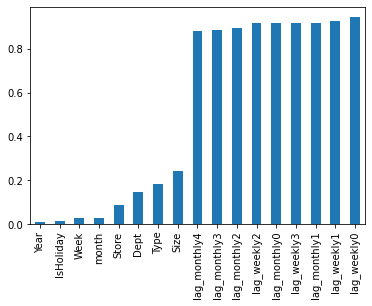

In [162]:
trainlag.corr()['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar');

##We see high correlation between lag variable and weekly sales which is obvious.

#Modelling

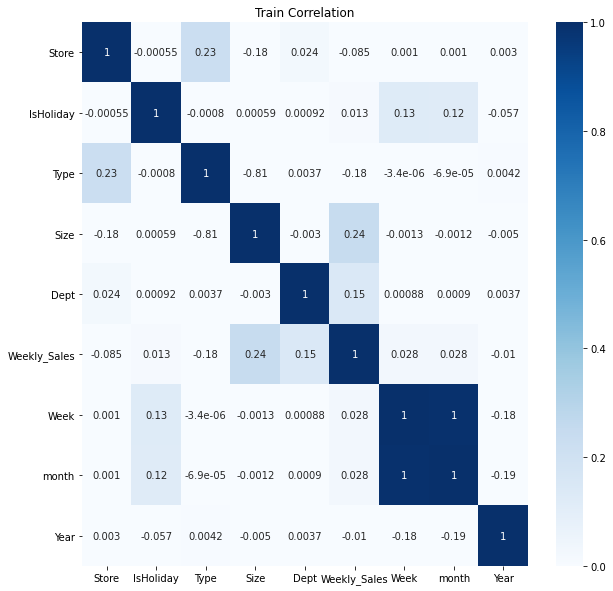

In [163]:
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(train.corr(), vmin= 0, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Train Correlation', fontdict={'fontsize':12});

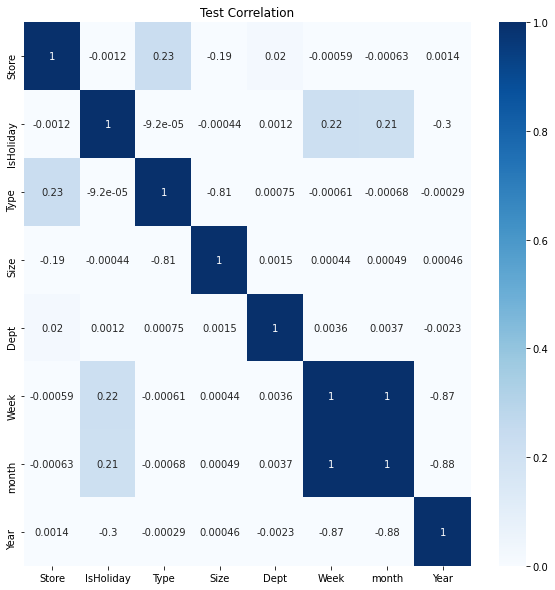

In [164]:
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(test.corr(), vmin= 0, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Test Correlation', fontdict={'fontsize':12});

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


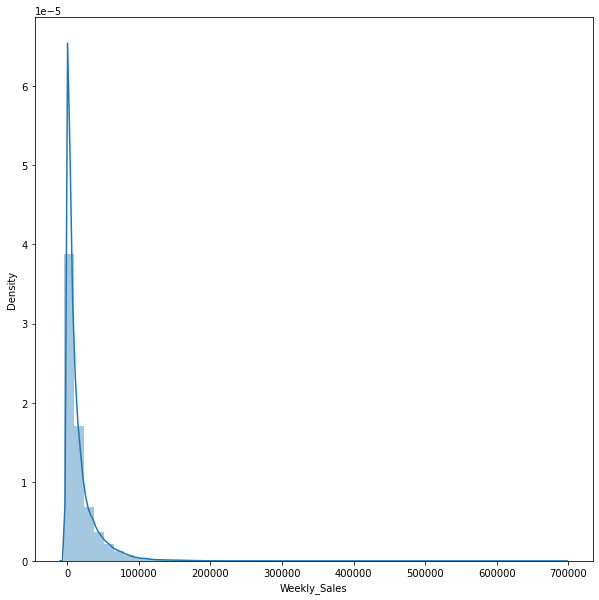

In [165]:
plt.figure(figsize=(10, 10))
sns.distplot(train['Weekly_Sales'] , hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


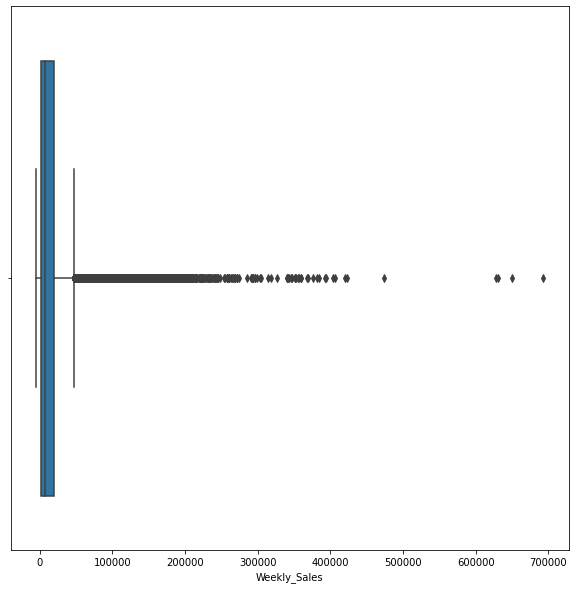

In [166]:
plt.figure(figsize=(10, 10))
sns.boxplot(train['Weekly_Sales'])

##The Data is skewed and there is no specific correlation between othe features and dependent variable therefore, I will stick to tree based models.

In [167]:
# importing relevant libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


In [168]:
X=train.drop(['Weekly_Sales','Date','Year'], axis = 1)
y= train['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [169]:
destree =  DecisionTreeRegressor()
rforest = RandomForestRegressor()
xgb = XGBRegressor()

#Decision Tree

In [170]:
def model(model_name):
  model_name.fit(X_train, y_train)
  pred = model_name.predict(X_test)
  return model_scores(pred)

def featimp(model_name):
  f_imp = model_name.feature_importances_
  plt.bar(X_train.columns,f_imp)
  plt.title('Feature Importance graph')
  plt.xticks(rotation=40)


def model_scores(predicted):
  rsquare= r2_score(y_test, predicted)
  Mean_abs_error = mean_absolute_error(y_test, predicted)
  Result = pd.DataFrame([rsquare,Mean_abs_error],columns=['Train Result'],index=['R2 score','MAE'])
  return Result



In [171]:
model(destree)

,Train Result
R2 score,0.965107
MAE,1928.209170


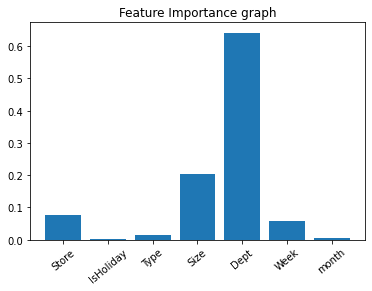

In [172]:
featimp(destree)

#Random forest

In [174]:
model(rforest)

,Train Result
R2 score,0.970179
MAE,1757.568630


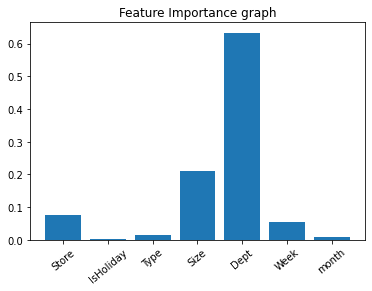

In [175]:
featimp(rforest)

#XGBoost

In [176]:
model(xgb)

[15:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train Result
R2 score,0.739240
MAE,6924.964723


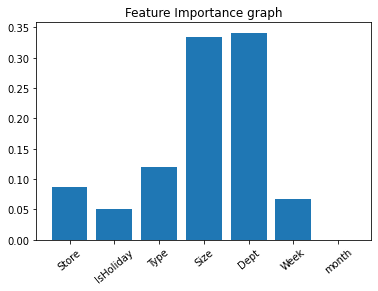

In [177]:
featimp(xgb)

##We can see size and department are the most important features.

#Grid SearchCV

In [178]:
randomf_param={'n_estimators': [50,70],
                                 'max_features': [3,4],
                                'max_depth': [10,20,30],
                               'min_samples_split': [3,5],
                                 'min_samples_leaf': [2,3]}


xgb_param = [ {'learning_rate': [0.01,0.03, 0.05],
               'max_depth': [7,8,9],
               'n_estimators': [50,100,150]}]

##Hyper-parameter tuning the models.

In [185]:
rgrid = GridSearchCV(estimator=rforest, param_grid = randomf_param, cv = 4, verbose=2, n_jobs=2)
rgrid.fit(X_train,y_train)
random_cvpred = rgrid.predict(X_test)
print(rgrid.best_params_)


Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  7.5min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 45.9min
[Parallel(n_jobs=2)]: Done 192 out of 192 | elapsed: 59.2min finished


{'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 70}


In [186]:
model_scores(random_cvpred)


,Train Result
R2 score,0.968416
MAE,1755.002143


In [188]:
xgbgrid = GridSearchCV(estimator=xgb, param_grid = xgb_param, cv = 3, verbose=2, n_jobs=3)
xgbgrid.fit(X_train,y_train)
xgb_cvpred = xgbgrid.predict(X_test)
print(xgbgrid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 13.4min
[Parallel(n_jobs=3)]: Done  81 out of  81 | elapsed: 31.3min finished


[18:16:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 150}


In [189]:
model_scores(xgb_cvpred)


,Train Result
R2 score,0.958495
MAE,2568.513028


##Making Final predictions

In [179]:
ftrX=train.drop(['Weekly_Sales','Date','Year'],axis=1)
ftry=train['Weekly_Sales']
ftest=test.drop(['Date','Year'],axis=1)


In [180]:
rgridf = GridSearchCV(estimator=rforest, param_grid = randomf_param, cv = 4, verbose=2, n_jobs=3)
rgridf.fit(ftrX,ftry)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  6.3min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 39.4min
[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed: 51.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [181]:
rf_cv_predsf = rgridf.predict(ftest)
rf_cv_predsf

array([32420.33807399, 23473.1064034 , 22828.00580918, ...,
        1008.69280769,   604.39547431,   624.80417103])

In [182]:
test['Weekly_sales_predict']=rf_cv_predsf

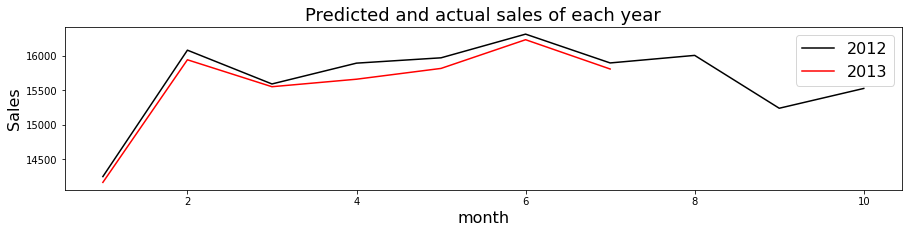

In [187]:
plt.figure(figsize=(15,3))
train[train['Year']==2012].groupby('month').mean()['Weekly_Sales'].plot(color='black')
test[test['Year']==2013].groupby('month').mean()['Weekly_sales_predict'].plot(color='red')
plt.title('Predicted and actual sales of each year', fontsize=18)
plt.legend(['2012', '2013'], fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('month', fontsize=16);

In [184]:
Result = pd.read_csv('/content/drive/MyDrive/bluepi/sales-prediction/test.csv.zip')
Result['Weekly_Sales_Predicted'] = rf_cv_predsf
Result.to_csv(r'/content/drive/MyDrive/bluepi/sales-prediction/Submit.csv/Submit.csv',index=False)

#**Summary**:

##EDA:
* There are only 4 holidays which come on a fixed day every year.
* We can see that some stores are not performing well, this could be effect of type or the size of the store.
* We don't know how the store types are decided, let's compare store type to size.
* Number of stores of type A are greater, followed by B and C.
* Averages sales of stores based on type are proportional to number of stores of a specific type.

* We can se that there is a hike in prices at year end but we can see there is a hike in sales near month ends too, which could be because people usually get salaries around then, this could help the store to have some promotions or offers then to hike their sales.
* For all the stores, holidays show hike in sales. This could be because of some promotions that the store might be having during holiday season.

* We have 99 departments and we can see a vast difference in the sales of some departments, this could be because of locality or area if givwn that data we might narrow this down. It can also be affected because of unemployment, company should find a reason why that is so.

* We can see kind of same pattern of sales even within the departments wrt to store type, when we see for holidays only 4 to 5 Departments such as 65,72, 92 show a drastic difference in sales on holidays and non holidays.
* If we see sales every year, we can see a pattern for every year, the could be seasonal departments such as Stationaries, Winter wear, Rain wear etc. 
* We can also see some departments are not doing well at all throught the year.
* In this case if the company could manage the floor space in a way that less selling departments should be shifted to bigger stores and the departments that do well should be increased.

* As sales is higher during holidays and it’s seasonal, stores can add season specific items.

* Hike in sale at year-end in all three years can be seen.(coincidinding with holiday)

* There is a hike in sales corresponding to month with holidays.
* Also we can see slight changes within the months which tells us the slight change in sales every week.
* The data suggests that the sales in november and december are so high that the company can hire more during september because, cost of that human resource would be less as compared to the benefits of better sales in winter months.

* Temperature shows seasonality, fuel price and CPI show and increasing trend while unemployment shows a decreasing trend over the years.
* None of the featurs show any significant relation with the sales.

* We don't see a very high correlation of MarkDowns with weekly sales.
* We have Markdown columns from november 2011 but the data suggests no specific change in that time period. This could mean that the weightage of seasonal sales and holidays is more as compared to promotions.






##Feature Selection and Feature Engineering.

* Temperature, fuel price, CPI and unemployment show no specific effect on the data hence I would drop them.
* Similarly MarkDown columns could also be dropped as filling null with 0 would not make a huge difference and filling them with averages could give wrong information because we don't know how they are calculated and if they are related to each other or weekly sales.

* To predict the future sales we can create following features:
        1. lag_weekly : Lag between one week to other to capture relation of sales with the previous week.
        2. lag_monthly : Lag to compare 1st week of a month to 1st week of previous month, this would help us capture effect of daily promotions or discounts, if any.
        3. Differentials : These would be features that would depict the difference between lags.
        4. Quaterly_lag : To capture sales in the quaters of a year.

#Modeling:
* For this problem I chose to go with the traditional ML models.
* The dependent variable was skewed and there was not a very high correlation between dependent and independent variables also removing outliers would lead to a huge loss of data hence I decided to go with **tree based models**.
* The **random forest** performed well amongst the three models.
* For **cross-validation** and **hyper-parameter tuning** I used grid search CV.
* Since randomforest was best performing model, I selected it to be my final model.

**Scope of modeling.**
* Due to restrictions of my device, I could not use lag variables in my model though I put df with weekly and monthly lag.
* Since lag feature are highly correlated to we could use PCA which would perform component reduction and feature selection.
* We could also use some other models like GBM, Light GBm etc along with ensembling to get better results.
* We could use weighted averages along with lagging and differential features.
* Using time series based models might also yield better results.



#Conclusion:
Through the analysis we have figured out various factors that affect the sales of the the various stores of the companyand we came up with random forest to be our best model. Our model predicts the sales for Nov 2012 to July 2013 and we can see it to be similar to the previous year.